In [4]:

from sklearn.datasets import make_circles
X, y = make_circles(1000,noise=0.03, random_state=42)

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [5]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = 100 * correct /  len(y_pred)
    return acc

In [6]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


In [7]:
from torch import nn
model = nn.Sequential(
    nn.Linear(2,5),
    nn.ReLU(),
    nn.Linear(5,5),
    nn.ReLU(),
    nn.Linear(5,1),

)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


In [8]:
device='cpu'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

torch.manual_seed(42)
epochs = 1500

for epoch in range(epochs):
    train_logits = model(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))
    loss = loss_fn(train_logits, y_train)# BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_train, train_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_pred, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

        if epoch %100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%") 



Epoch: 0 | Loss: 0.70596, Accuracy: 50.00% | Test Loss: 0.81326, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69062, Accuracy: 58.00% | Test Loss: 0.70231, Test Accuracy: 61.50%
Epoch: 200 | Loss: 0.68597, Accuracy: 59.00% | Test Loss: 0.69471, Test Accuracy: 63.50%
Epoch: 300 | Loss: 0.67959, Accuracy: 58.00% | Test Loss: 0.70332, Test Accuracy: 62.50%
Epoch: 400 | Loss: 0.66877, Accuracy: 57.38% | Test Loss: 0.69712, Test Accuracy: 63.50%
Epoch: 500 | Loss: 0.65580, Accuracy: 57.75% | Test Loss: 0.69851, Test Accuracy: 62.50%
Epoch: 600 | Loss: 0.63571, Accuracy: 65.00% | Test Loss: 0.67091, Test Accuracy: 68.50%
Epoch: 700 | Loss: 0.58949, Accuracy: 73.38% | Test Loss: 0.63871, Test Accuracy: 73.50%
Epoch: 800 | Loss: 0.47314, Accuracy: 82.25% | Test Loss: 0.58371, Test Accuracy: 84.50%
Epoch: 900 | Loss: 0.23223, Accuracy: 99.25% | Test Loss: 0.51251, Test Accuracy: 98.50%
Epoch: 1000 | Loss: 0.10550, Accuracy: 99.88% | Test Loss: 0.50510, Test Accuracy: 99.50%
Epoch: 1100 | Loss: 0.

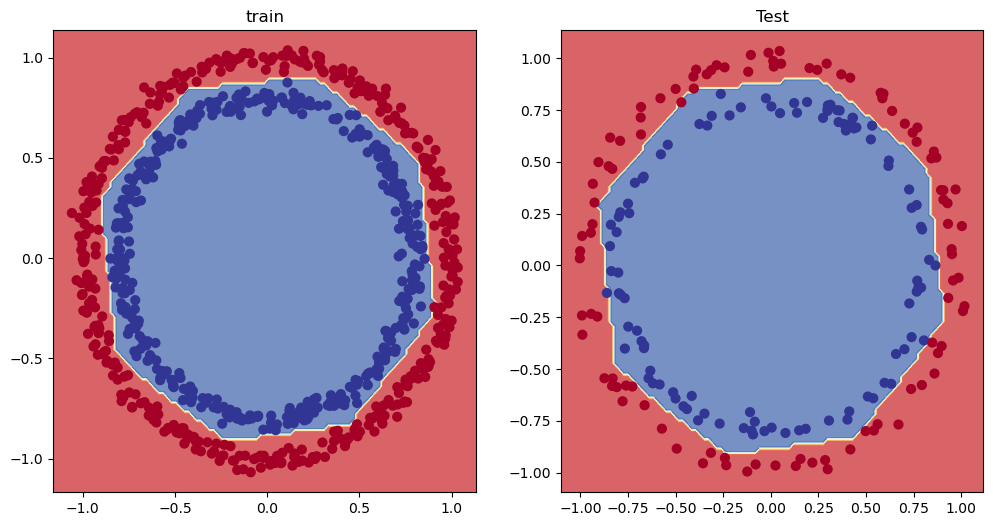

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model, X_train,y_train)


plt.subplot(1,2,2) 
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)


In [11]:
import torch

A = torch.arange(-10,10,1, dtype=torch.float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

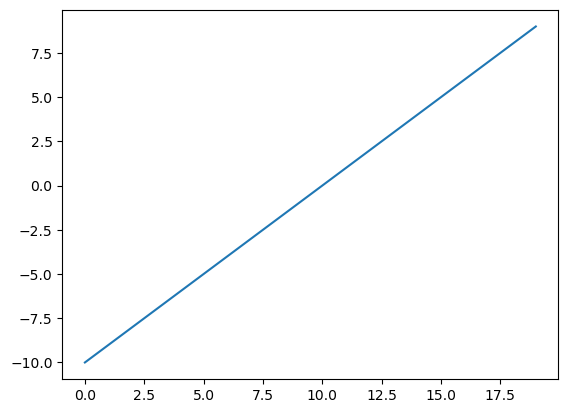

In [12]:
plt.plot(A)

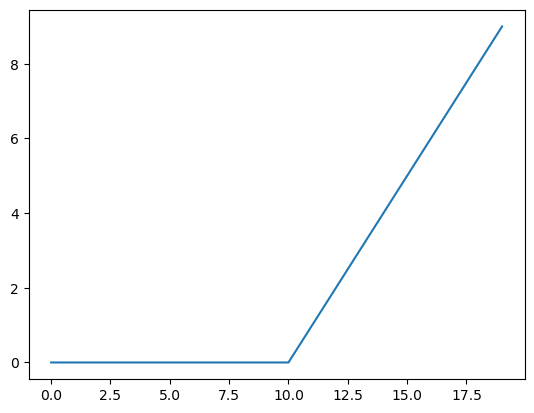

In [14]:
plt.plot(torch.relu(A))

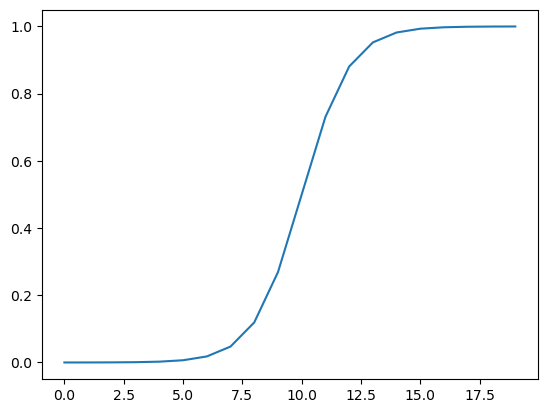

In [15]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

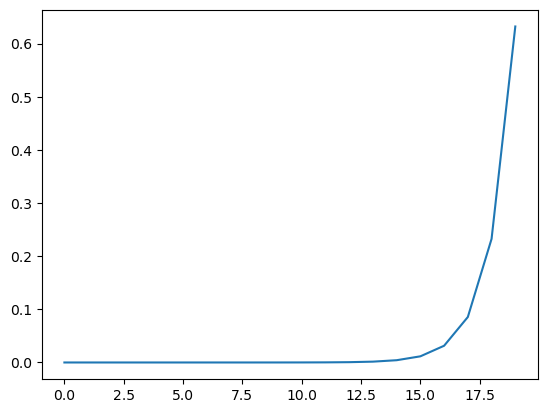

In [17]:
plt.plot(torch.softmax(A,0))